# 同次微分方程式
**同次微分方程式** とは，微分方程式の関数 $f(x,y)$ が$f(\frac{y}{x})$であるとき，つまり，以下のような形式の微分方程式のことを示す．

$$
\begin{align}
\frac{dy}{dx} = f\left(\frac{y}{x}\right)
\end{align}
$$

この一般解は以下で与えられる．

$$
\begin{align}
\int \frac{1}{f(u) -u}du= \log | x | + C
\end{align}
$$

ただし，$C$は積分定数とする．

## 一般解の導出
同次微分方程式をを解くためには，$\frac{y}{x}=u$として変数変換をすれば良い．この変数変換は

$$
\begin{align}
\frac{y}{x}=u \Rightarrow y = xu
\end{align}
$$

であり，これを$x$について微分すると，

$$
\begin{align}
\frac{dy}{dx} = u + x\frac{du}{dx}
\end{align}
$$

のようになる．ここで $u=y/x$ という $x$ の関数なので右辺は積の微分を利用する．そして，$u$について整理すると，

$$
\begin{align}
\frac{du}{dx} = \frac{1}{x} \left(\frac{dy}{dx} -u\right)
\end{align}
$$

となり，$\frac{dy}{du}=f\left(\frac{y}{x}\right)=f(u)$であるので，次の形になる．

$$
\begin{align}
\frac{du}{dx} = \frac{1}{x} \left(f(u) -u\right)
\end{align}
$$

上記の式は $u$ と $x$ のみが含まれ，$u$ と $x$ について以下のように整理すると変数分離形となる．

$$
\begin{align}
\frac{1}{f(u) -u}du= \frac{1}{x} dx
\end{align}
$$

変数分離形の解法と同様に両辺を積分し，

$$
\begin{align}
\int \frac{1}{f(u) -u}du= \int \frac{1}{x} dx
\end{align}
$$

以下の一般解が得られる．

$$
\begin{align}
\int \frac{1}{f(u) -u}du= \log | x | + C
\end{align}
$$

ただし，$C$は積分定数とする．

```{admonition} 積の微分法則
積の微分法則とは $y=f(x)g(x)$ という関数の変数$x$ の微分は以下となる法則である．

$$
\frac{dy}{dx} = f'(x)g(x) + f(x)g'(x)
$$

$u$ の変数変換では，$u$ は $x$ の関数であるので，$y'=u'x + ux'$ という微分になっていることに注意されたい．
```

## 同次微分方程式の具体例
では，次の同次微分方程式を解いてみよう．

$$
\frac{dy}{dx} = \frac{x^2 + y^2}{xy}
$$

解答はクリックで確認できる．

````{toggle}

一見すると変数分離形とも同次形とも見て取れないが，ここで，右辺を $x^2$ で割ると以下のように $y/x$ の形が現れる．

$$
\frac{dy}{dx} = \frac{1 + \left(\frac{y}{x}\right)^2}{\left(\frac{y}{x}\right)}
$$

ここで $u=\frac{y}{x}$ として変数変換をする．前述より，

$$
\begin{align}
u + x\frac{du}{dx} &= \frac{1 + u^2}{u}
\end{align}
$$

であり，変数変換をした $y$ の導関数を $\frac{dy}{dx} = \frac{1 + u^2}{u}$ を代入すると

$$
\begin{align}
\frac{dy}{dx} &= u + x\frac{du}{dx} \\
u + x\frac{du}{dx} &= \frac{1 + u^2}{u} \\
x\frac{du}{dx} &= \frac{1 + u^2}{u} - u \\
x\frac{du}{dx} &= \frac{1}{u} \\
u du &= \frac{1}{x} dx
\end{align}
$$

と変数分離形となった．変数分離形の解法にしたがって両辺を積分する．

$$
\begin{align}
\int u du &= \int \frac{1}{x} dx \\
\frac{u^2}{2} &= \log |x| + D \\
u^2 &= 2 \log |x| + 2D \\
\end{align}
$$

最後に，$u=\frac{y}{x}$ を代入し，$y$ について整理すると，

$$
\begin{align}
\frac{y^2}{x^2} &= 2 \log |x| + 2D \\
y^2 &= 2 x^2 \log |x| + 2D x^2 \\
y &= \pm x \sqrt{2 \log |x| + C}
\end{align}
$$

として，一般解が得られる．ここで，$D$は積分定数であり，$C=2D$とした．
````

## Pythonによる実装
では，これをsympyで解く．

In [3]:
from sympy import symbols, Eq, Derivative, Function, dsolve

# 変数，関数，導関数を定義．
x = symbols('x')
y = Function('y')(x)
dy = Derivative(y, x)

# 与えられた同次微分方程式を定義
eq = Eq(dy, (x**2 + y**2) / (x*y))

# 微分方程式を解く．
y_ = dsolve(eq, y)

このとき手計算した一般解からもわかるように $y$ は二つの一般解を持つことに注意する．

In [4]:
y_[0]

Eq(y(x), -x*sqrt(C1 + 2*log(x)))

In [5]:
y_[1]

Eq(y(x), x*sqrt(C1 + 2*log(x)))

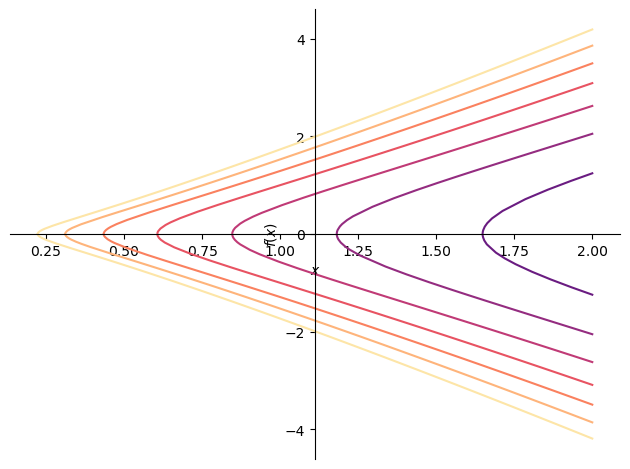

In [6]:
import numpy as np
from sympy import plotting
import matplotlib.pyplot as plt

N = 10

eqs = []
for c in np.linspace(-3, 3, N):
    eqs.append(y_[0].rhs.subs(symbols('C1'), c))
    eqs.append(y_[1].rhs.subs(symbols('C1'), c))
p = plotting.plot(*eqs, (x, -2, 2), show=False)

cm = plt.get_cmap('magma', N*2)
for i in range(0, cm.N, 2):
    p[i].line_color = cm(i)
    p[i+1].line_color = cm(i)
p.show()